In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Loading datasets

In [2]:
fitbit_daily_activity_df = pd.read_csv('../../../../data/public_data/cleaned/fitbit/cleaned_daily_activity.csv')
fitbit_daily_activity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


# Convert ActivityDate column to DateTime data type

In [3]:
fitbit_daily_activity_df['ActivityDate'].dtype

dtype('O')

In [4]:
fitbit_daily_activity_df['ActivityDate'] = pd.to_datetime(fitbit_daily_activity_df['ActivityDate'])
fitbit_daily_activity_df['ActivityDate'].dtype

dtype('<M8[ns]')

In [5]:
fitbit_daily_activity_df['ActivityDate'] = pd.to_datetime(fitbit_daily_activity_df['ActivityDate'])
fitbit_daily_activity_df['ActivityDate'].dtype

dtype('<M8[ns]')

In [6]:
fitbit_daily_activity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [7]:
fitbit_daily_activity_df = fitbit_daily_activity_df.drop(columns=['Id', 'ActivityDate']) # ignoring the Id and Date for now...
len(fitbit_daily_activity_df)

1234

In [8]:
fitbit_daily_activity_df.describe()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,8121.300648,5.820567,5.790413,0.143076,1.572326,0.607561,3.602877,0.001929,22.109400,15.136143,209.283630,951.935981,2345.077796
std,4897.590725,3.816192,3.804229,0.732379,2.720970,0.899906,1.900541,0.008205,32.817076,27.622838,98.967741,280.736579,719.893006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000
25%,4507.500000,3.100000,3.050000,0.000000,0.000000,0.000000,2.252500,0.000000,0.000000,0.000000,145.000000,721.000000,1850.250000
50%,7748.000000,5.440000,5.430000,0.000000,0.330000,0.280000,3.565000,0.000000,6.000000,8.000000,209.500000,1003.500000,2204.500000
75%,11036.250000,7.837500,7.827500,0.000000,2.140000,0.840000,4.880000,0.000000,33.000000,21.000000,272.000000,1185.000000,2811.750000
max,36019.000000,28.030001,28.030001,6.727057,21.920000,6.480000,12.510000,0.110000,210.000000,660.000000,720.000000,1439.000000,4900.000000


# Feature Engineering to combine activity minutes

In [9]:
# using the ActivityMinutes scale: 1=light, 2=moderate, 3=very active. Combine the minutes by their scale to get a total combination of activity minutes.
fitbit_daily_activity_df['TotalActivityMinutes'] = (fitbit_daily_activity_df['LightlyActiveMinutes']) + (fitbit_daily_activity_df['FairlyActiveMinutes'] * 2) + (fitbit_daily_activity_df['VeryActiveMinutes'] * 3)

In [10]:
# focusing on totalSteps, totalActivityMinutes, Calories, TotalDistance and TrackerDistance. (ignoring the very/moderate/light/sedentary active distances for now)
pca_df = fitbit_daily_activity_df[['TotalSteps', 'TotalActivityMinutes', 'Calories', 'TotalDistance', 'TrackerDistance']]
pca_df.head()

,TotalSteps,TotalActivityMinutes,Calories,TotalDistance,TrackerDistance
0,11004,328,1819,7.11,7.11
1,17609,575,2154,11.55,11.55
2,12736,446,1944,8.53,8.53
3,13231,381,1932,8.93,8.93
4,12041,383,1886,7.85,7.85


/var/folders/jn/tpkp2dnx08592l_y59z9_f3m0000gn/T/ipykernel_74829/4290721683.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pca_df.hist(ax=axis, bins=20)


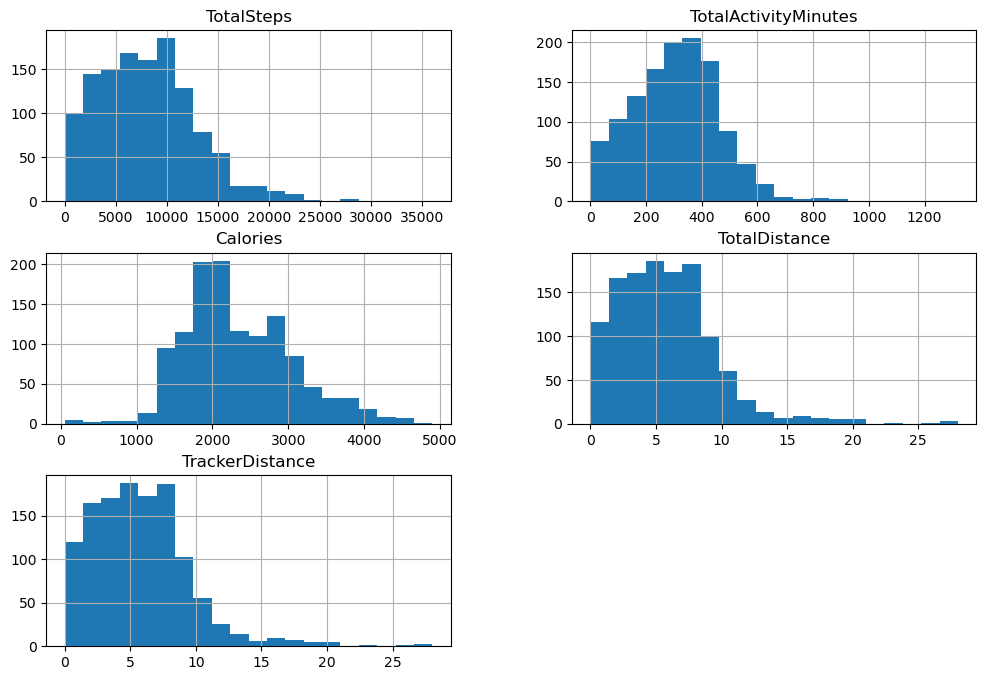

In [11]:
# inspecting the distribution of each feature:
fig, axis = plt.subplots(figsize=(12, 8))
pca_df.hist(ax=axis, bins=20)
plt.show()

In [12]:
pca_df.skew()

TotalSteps              0.779597
TotalActivityMinutes    0.447907
Calories                0.523850
TotalDistance           1.324479
TrackerDistance         1.333065
dtype: float64

In [13]:
before_unskewed_df = pca_df.copy() #(for comparison after)

In [14]:
def box_cox_transformation(feature, l):
    transform = ColumnTransformer(transformers=[("box-cox", FunctionTransformer(lambda X: stats.boxcox(X, lmbda=l)), [feature])])
    return pd.DataFrame(transform.fit_transform(pca_df))

In [15]:
pca_df['TotalSteps'] = box_cox_transformation(feature="TotalSteps", l=0.65)
pca_df['TotalActivityMinutes'] = box_cox_transformation(feature="TotalActivityMinutes", l=0.8)
pca_df['Calories'] = box_cox_transformation(feature="Calories", l=0.6)
pca_df['TotalDistance'] = box_cox_transformation(feature="TotalDistance", l=0.55)
pca_df['TrackerDistance'] = box_cox_transformation(feature="TrackerDistance", l=0.56)

/var/folders/jn/tpkp2dnx08592l_y59z9_f3m0000gn/T/ipykernel_74829/1570982482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_df['TotalSteps'] = box_cox_transformation(feature="TotalSteps", l=0.65)
/var/folders/jn/tpkp2dnx08592l_y59z9_f3m0000gn/T/ipykernel_74829/1570982482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_df['TotalActivityMinutes'] = box_cox_transformation(feature="TotalActivityMinutes", l=0.8)
/var/folders/jn/tpkp2dnx08592l_y59z9_f3m0000gn/T/ipykernel_74829/1570982482.py:3: Set

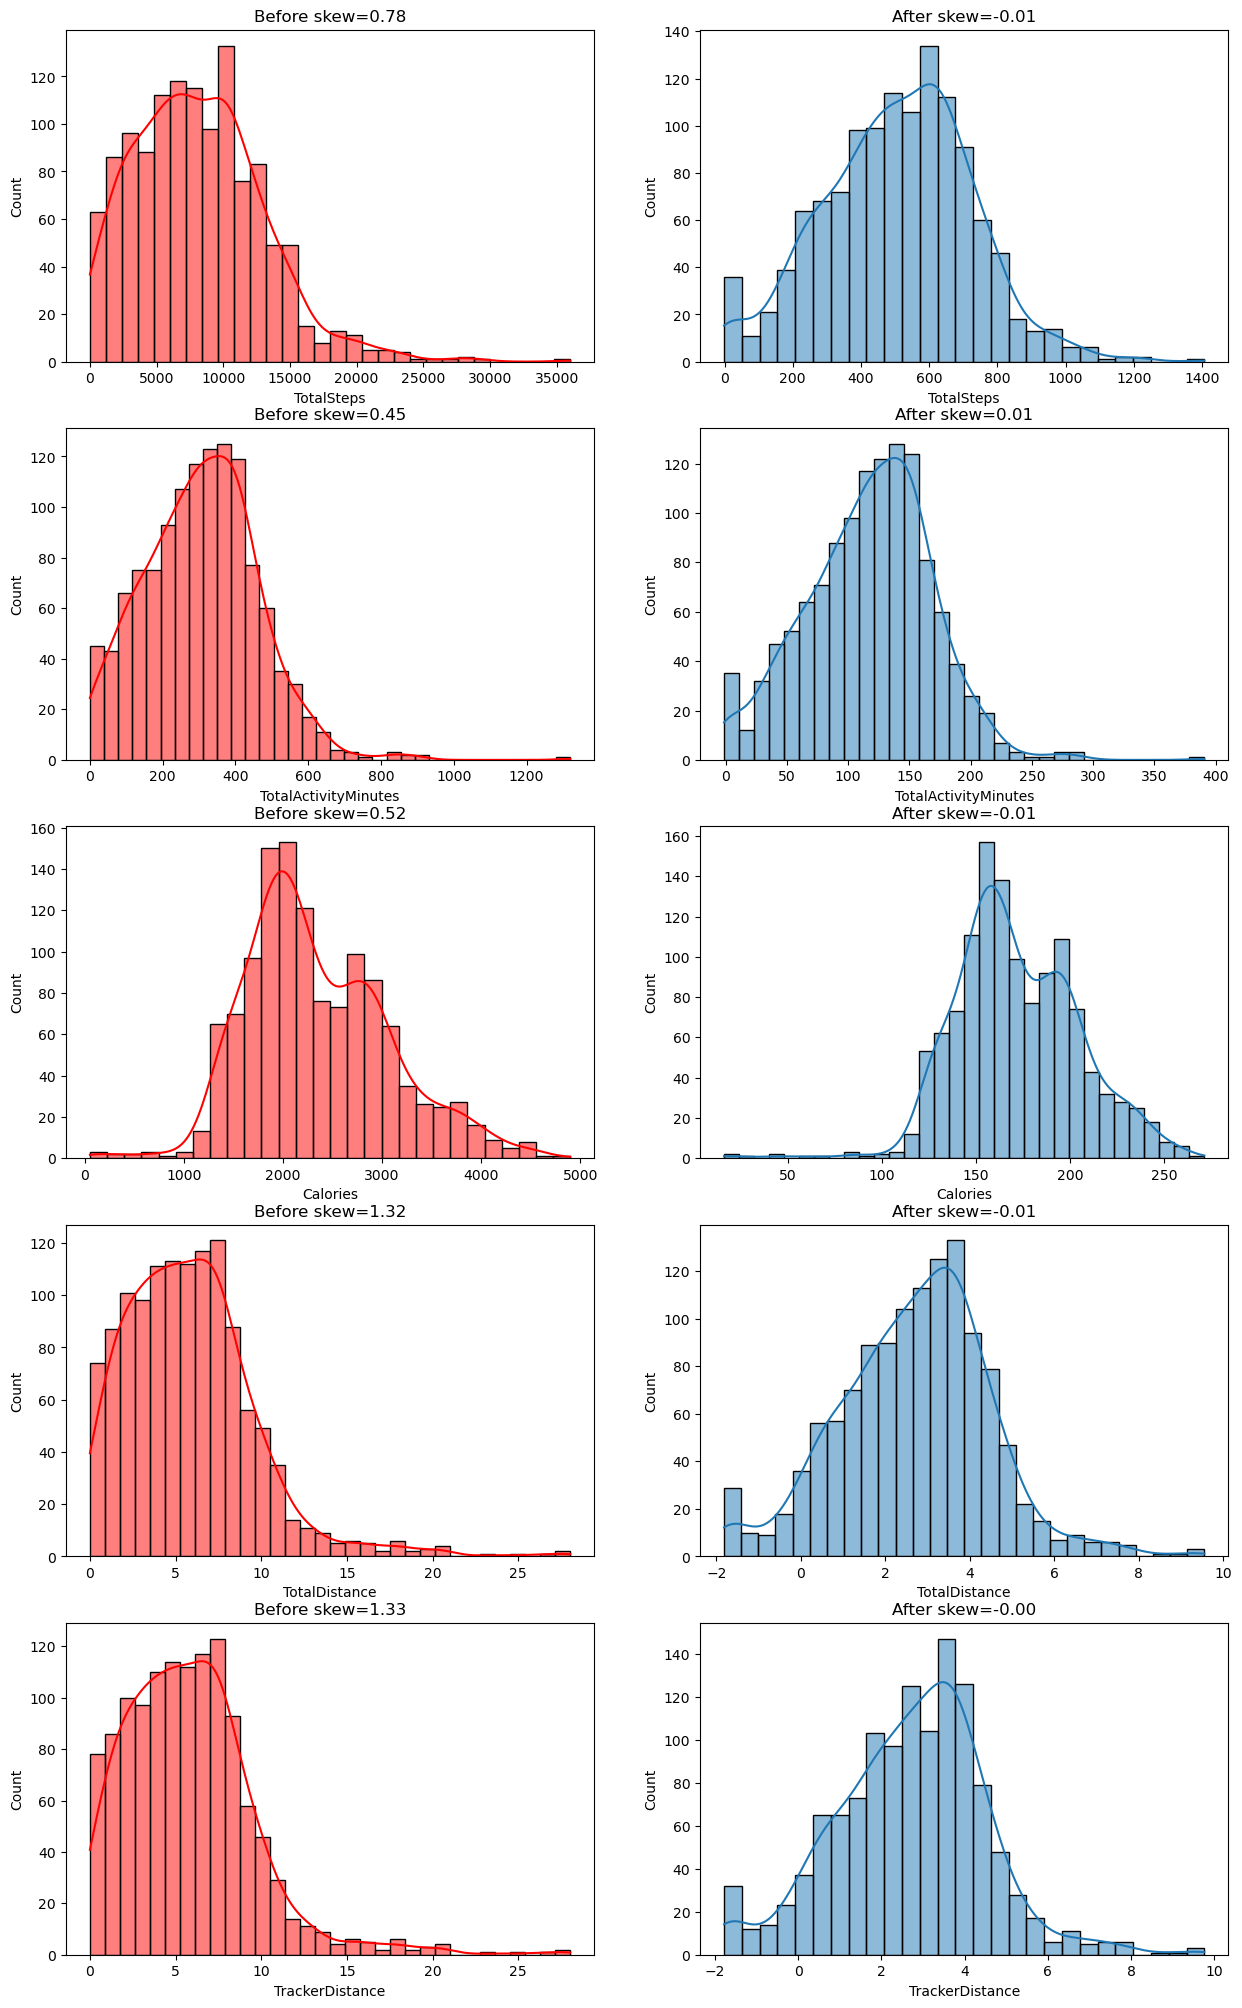

In [16]:
fig, ax = plt.subplots(5, 2, figsize=(15,25))

def plot_skew(feature, ax_pos):
    sns.histplot(before_unskewed_df[feature], kde=True, ax=ax_pos[0], color='red').set(title=f"Before skew={before_unskewed_df[feature].skew():0.2f}")
    sns.histplot(pca_df[feature], kde=True, ax=ax_pos[1]).set(title=f"After skew={pca_df[feature].skew():0.2f}")

plot_skew(feature='TotalSteps', ax_pos=[ax[0,0], ax[0,1]])
plot_skew(feature='TotalActivityMinutes', ax_pos=[ax[1,0], ax[1,1]])
plot_skew(feature='Calories', ax_pos=[ax[2,0], ax[2,1]])
plot_skew(feature='TotalDistance', ax_pos=[ax[3,0], ax[3,1]])
plot_skew(feature='TrackerDistance', ax_pos=[ax[4,0], ax[4,1]])

# Scaling features

In [17]:
scaler = StandardScaler()
scaled_pca = scaler.fit_transform(pca_df)
scaled_pca

array([[ 0.65421049,  0.19547012, -0.6989935 ,  0.47230233,  0.47793769],
       [ 1.72260393,  1.62396863, -0.20510907,  1.38895365,  1.39909155],
       [ 0.95213741,  0.89777839, -0.51076729,  0.78800054,  0.79467658],
       ...,
       [ 0.60615396,  0.02185493,  0.70863036,  0.70599939,  0.71235013],
       [ 2.27363777,  1.21192936,  1.909139  ,  2.70429267,  2.72762239],
       [ 0.10737306, -0.57405169, -0.65335921,  0.23505665,  0.24030595]])

In [18]:
scaled_pca_df = pd.DataFrame(scaled_pca, columns=pca_df.columns)
scaled_pca_df

,TotalSteps,TotalActivityMinutes,Calories,TotalDistance,TrackerDistance
0,0.654210,0.195470,-0.698993,0.472302,0.477938
1,1.722604,1.623969,-0.205109,1.388954,1.399092
2,0.952137,0.897778,-0.510767,0.788001,0.794677
3,1.034621,0.516268,-0.528623,0.872561,0.879611
4,0.834406,0.528191,-0.597483,0.640039,0.646156
...,...,...,...,...,...
1229,0.597776,0.046849,0.727787,0.697269,0.703587
1230,2.104990,1.058622,1.770043,2.508676,2.529617
1231,0.606154,0.021855,0.708630,0.705999,0.712350
1232,2.273638,1.211929,1.909139,2.704293,2.727622


In [19]:
scaled_pca_df.describe()

,TotalSteps,TotalActivityMinutes,Calories,TotalDistance,TrackerDistance
count,1234.000000,1.234000e+03,1.234000e+03,1.234000e+03,1.234000e+03
mean,0.000000,9.212872e-17,-2.188057e-16,1.612253e-16,2.072896e-16
std,1.000405,1.000405e+00,1.000405e+00,1.000405e+00,1.000405e+00
min,-2.334830,-2.324470e+00,-4.777488e+00,-2.524803e+00,-2.472619e+00
25%,-0.661498,-6.553174e-01,-6.514643e-01,-6.262504e-01,-6.358133e-01
50%,0.044732,7.799978e-02,-1.334124e-01,6.193901e-02,6.452268e-02
75%,0.659902,6.688500e-01,6.827042e-01,6.372661e-01,6.411464e-01
max,4.125720,5.351800e+00,3.059077e+00,3.848527e+00,3.888388e+00


# PCA

In [20]:
#PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_pca_df)
principal_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

In [21]:
principal_df

,PC1,PC2
0,0.607189,-1.006262
1,2.799925,-1.238825
2,1.429247,-1.060648
3,1.372450,-1.112093
4,1.036764,-1.037716
...,...,...
1229,1.225374,0.256229
1230,4.488716,0.105758
1231,1.219850,0.234224
1232,4.873219,0.110279


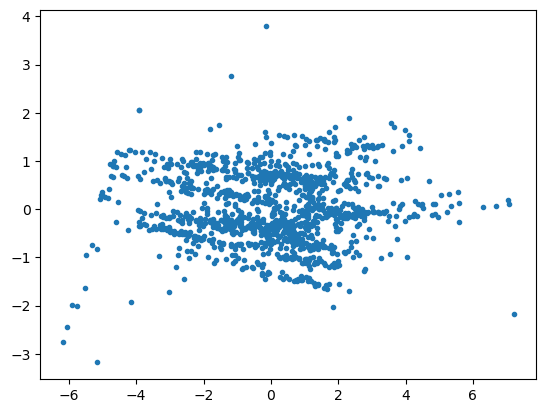

In [22]:
plt.plot(principal_df['PC1'], principal_df['PC2'], '.')
plt.show()

In [23]:
#? n_clusters?
kmeans_labels = KMeans(n_clusters=8, random_state=0).fit_predict(principal_df.values)

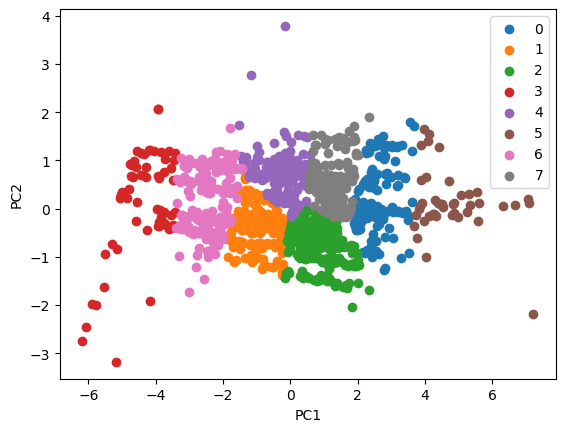

In [24]:
#Getting unique labels
 
u_labels = np.unique(kmeans_labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(principal_df[kmeans_labels == i]['PC1'], principal_df[kmeans_labels == i]['PC2'] , label = i)
plt.legend()

plt.title("")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()